In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
# url = "https://cdn.pixabay.com/photo/2015/01/07/16/37/wood-591631_960_720.jpg"
url = 'https://github.com/cszn/DPSR/blob/master/testsets/real_imgs/LR/chip.png?raw=true'
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content) 

## Original image

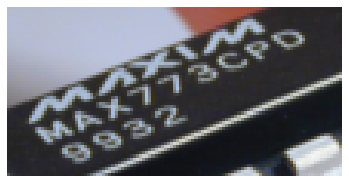

In [ ]:
image = cv2.imread('test.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(image)

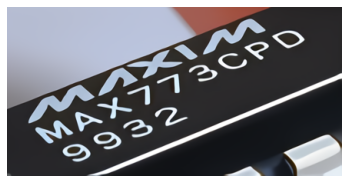

In [ ]:
high_res_url = "https://raw.githubusercontent.com/cszn/DPSR/master/testsets/real_imgs/x4_dpsr/chip_x4.png"
r = requests.get(high_res_url)
with open('high_res.jpg', 'wb') as f:
    f.write(r.content) 

high_res_image = cv2.imread('high_res.jpg')
high_res_image = cv2.cvtColor(high_res_image, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(high_res_image)

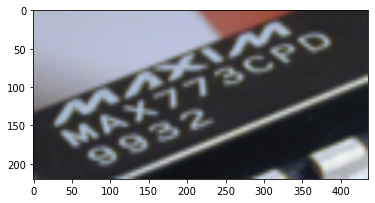

In [ ]:
image = cv2.resize(image, dsize=(436, 220))
plt.imshow(image)

## Sharpen using kernel

(-0.5, 435.5, 219.5, -0.5)

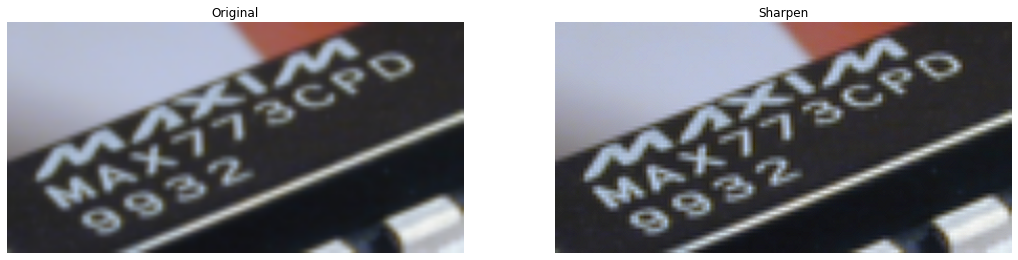

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img)
plt.title('Sharpen')
plt.axis("off")

## Compute PSNR

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     value = PSNR(image, high_res_image)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 31.931328008154214 dB


## Performance on real-world image

In [1]:
real = 'https://i.guim.co.uk/img/media/cc0fffb379763aab7bcacaaaa802ef325d09e5d1/0_0_3500_2333/master/3500.jpg?width=1020&quality=85&auto=format&fit=max&s=45df654af9487480a02028403262b5ac'

In [3]:
r = requests.get(real)
with open('real.jpg', 'wb') as f:
    f.write(r.content) 

In [4]:
image = cv2.imread('real.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

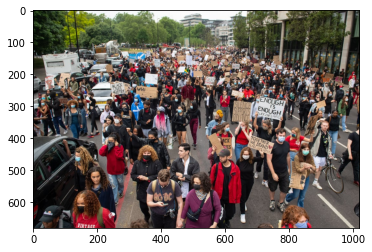

In [6]:
plt.imshow(image)

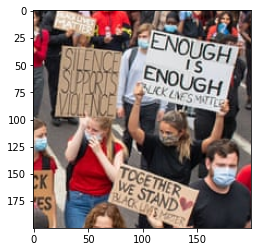

In [16]:
cropped_image = image[250:450, 600:800]
plt.imshow(cropped_image)

(-0.5, 199.5, 199.5, -0.5)

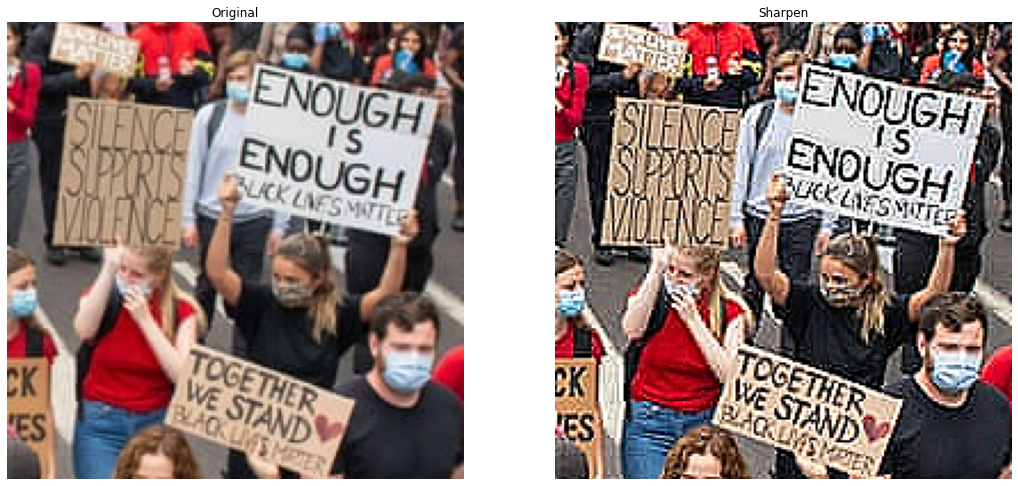

In [17]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

img = cv2.filter2D(src=cropped_image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(cropped_image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img)
plt.title('Sharpen')
plt.axis("off")